# Problem 4 - Batch Normalization, Dropout, MNIST

## 4.1

**Answer:**

- *co-adaptation*:
Co-adaptiation happenes in Neural Networks when certain neurons start to depend on each other too closely and thus a change in outputs of one can cause change in the other and with that cause a change in the distribution of the inputs to next layer and potentialy the output as well as cause the model to overfitt. In other words, multiple neurons might change their weights to adapt to each others outputs and noise and with that potentially change the whole output of the network. Droupout method can be used (as we will show below) to attempt to optimize this issue by "dropping" specified number of layers and with that prevent overditting.

- Example: If we have a network that is made to detect similar features in our input data, over time (training) neuron 2 starts to heavily depend on the output of neuron 1 and with that base it's output on the output of neuron 1 rather than the input data. This can make model less generalizable and we call this co-adaptation.


- *covariance-shift*: Covariance-shift is when distribution of our layer's inputs changes during training. This shift in input layers can cause issues and shifts in every next layer which results in continous shift of the distribution and change in output. We can minimize this shift by using Batch Normalization as it standarizes the inputs to each layer, reducing the amount of shift and allowing for higher learning rates.

- Example: As we know in neural networks when earlier layers update their weights through training their outputs are inputed into next layers and can change their entire distribution. This means that if there is a shift in earlier layers (and the input), following layers will constantly try to adapt to this shift in the input and early layer distribution which slows down the training and makes the network less reliable / precise and can give entirely incorrect distribution to the output.



## 4.2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, datasets

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Resize and normalize
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import initializers

#LeNet-5 model
model = models.Sequential()
#input layer
model.add(layers.InputLayer(input_shape=(28, 28, 1)))
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0, seed=None)

#hidden layers
#C1
model.add(layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', kernel_initializer=initializer))
model.add(layers.BatchNormalization())

#S2
model.add(layers.AveragePooling2D(2))

#C3
model.add(layers.Conv2D(16, kernel_size=(5, 5), activation='tanh'))
model.add(layers.BatchNormalization())

#S4
model.add(layers.AveragePooling2D(2))

model.add(layers.Flatten())

#F5
model.add(layers.Dense(120, activation='tanh'))
model.add(layers.BatchNormalization())

#F6
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.BatchNormalization())

#Output Layer
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))

469/469 [==============================] - 21s 42ms/step - loss: 0.3694 - accuracy: 0.8960 - val_loss: 0.1768 - val_accuracy: 0.9524
Epoch 2/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1574 - accuracy: 0.9566 - val_loss: 0.1208 - val_accuracy: 0.9684
Epoch 3/10
469/469 [==============================] - 18s 39ms/step - loss: 0.1201 - accuracy: 0.9663 - val_loss: 0.0954 - val_accuracy: 0.9737
Epoch 4/10
469/469 [==============================] - 20s 43ms/step - loss: 0.1006 - accuracy: 0.9716 - val_loss: 0.0851 - val_accuracy: 0.9763
Epoch 5/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0885 - accuracy: 0.9745 - val_loss: 0.0762 - val_accuracy: 0.9795
Epoch 6/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0795 - accuracy: 0.9776 - val_loss: 0.0699 - val_accuracy: 0.9805
Epoch 7/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0739 - accuracy: 0.9788 - val_loss: 0.0680 - val_accuracy: 0.9813
Epo

In [ ]:
gamma_values = [] #scale
beta_values = [] #offset

for layer in model.layers:
    if isinstance(layer, layers.BatchNormalization):
        gamma, beta = layer.get_weights()[0], layer.get_weights()[1] #get gamma & beta
        gamma_values.append(gamma)
        beta_values.append(beta)

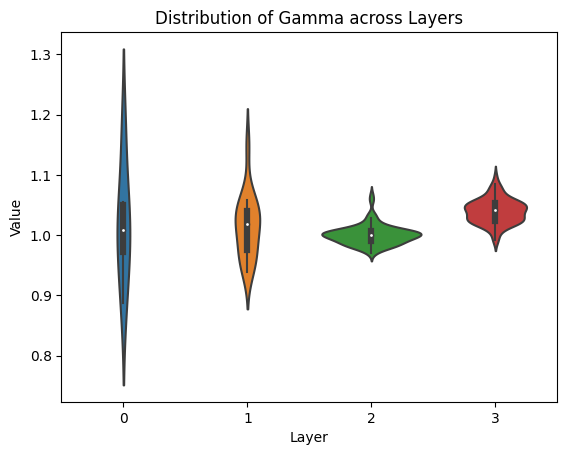

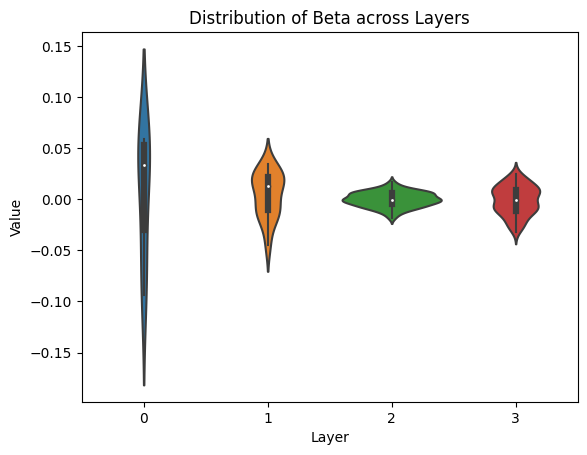

In [ ]:
import seaborn as sns
def plot_violin(data, title):
    parts = sns.violinplot(data, showmeans=True, showmedians=True)
    plt.title(title)
    plt.xlabel('Layer')
    plt.ylabel('Value')
    plt.show()

plot_violin(gamma_values, 'Distribution of Gamma across Layers')
plot_violin(beta_values, 'Distribution of Beta across Layers')


In [ ]:
layer_num = 1  # Start with layer number 1
for layer in model.layers:
    if isinstance(layer, layers.BatchNormalization):
        gamma, beta = layer.get_weights()[0], layer.get_weights()[1]
        print(f"Layer {layer_num}:")
        print("Gammas:", gamma)
        print("Betas:", beta)
        print("\n----------------------------------------------------------------\n")
        layer_num += 1

Layer 1:
Gammas: [0.9701827  1.0542846  0.97925854 0.88680327 1.0373259  1.1735066 ]
Betas: [ 0.04947073  0.0185072   0.05492895 -0.09351497 -0.04641745  0.05922478]

----------------------------------------------------------------

Layer 2:
Gammas: [0.9834268  1.0218307  0.9594096  0.9382839  1.1490554  0.94939774
 0.9686489  1.0327139  1.0568668  0.97763526 1.0143816  1.0272472
 1.013772   1.0353398  1.0548838  1.0579132 ]
Betas: [-0.01400938  0.01553834  0.02502315 -0.01018907  0.02751559  0.02400358
  0.02192136 -0.01006898  0.0183408   0.01062563  0.03427292 -0.00507448
 -0.04493916 -0.01095505 -0.02499525  0.01475809]

----------------------------------------------------------------

Layer 3:
Gammas: [1.0031357  1.0187632  1.0281314  1.0029758  1.0052873  0.9820105
 1.0000886  0.99224985 1.0031769  0.98144734 0.9905188  0.9963509
 0.99643373 0.994384   1.0073066  1.0021024  1.0065066  1.0074768
 0.99149    0.9974658  0.997215   0.9890898  1.0046828  0.99078816
 1.0165911  1.00627

Above we can see the 2 graphs showing beta and gamma distributions over our Batch Normalized layers. We can immediately notice that for layer 1 for both parameters our distribution is much broader than for other layers. We can also notice that for beta parameters, which show our offset, are clustering/centered around 0 for all the layers while gamma values, which show our scale, are clustering/centered around 1 for all the layers. Looking at the entire model, it is expected for gamma values to cluster around 1 and beta to cluster around 0, however we can notice that for first layer this there is a much wider range for both offset and scale but this might be due to the lack of pooling and the fact we are using standard normalization rather than batch for input layer.

## 4.3

In [ ]:
# LeNet-5 model with batch normalization for the input layer
model_bn_input = models.Sequential()

model_bn_input.add(layers.InputLayer(input_shape=(28, 28, 1)))
model_bn_input.add(layers.BatchNormalization())

model_bn_input.add(layers.Conv2D(6, kernel_size=(5, 5), activation='tanh'))
model_bn_input.add(layers.BatchNormalization())

model_bn_input.add(layers.AveragePooling2D(2))

model_bn_input.add(layers.Conv2D(16, kernel_size=(5, 5),  activation='tanh'))
model_bn_input.add(layers.BatchNormalization())

model_bn_input.add(layers.AveragePooling2D(2))

model_bn_input.add(layers.Flatten())

model_bn_input.add(layers.Dense(120, activation='tanh'))
model_bn_input.add(layers.BatchNormalization())

model_bn_input.add(layers.Dense(84, activation='tanh'))
model_bn_input.add(layers.BatchNormalization())

# Output Layer
model_bn_input.add(layers.Dense(10, activation='softmax'))

In [ ]:
model_bn_input.compile(optimizer=optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_bn_input = model_bn_input.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))


Epoch 1/10
469/469 [==============================] - 24s 50ms/step - loss: 0.4322 - accuracy: 0.8787 - val_loss: 0.2304 - val_accuracy: 0.9381
Epoch 2/10
469/469 [==============================] - 25s 53ms/step - loss: 0.2011 - accuracy: 0.9450 - val_loss: 0.1518 - val_accuracy: 0.9582
Epoch 3/10
469/469 [==============================] - 22s 48ms/step - loss: 0.1446 - accuracy: 0.9609 - val_loss: 0.1128 - val_accuracy: 0.9684
Epoch 4/10
469/469 [==============================] - 22s 48ms/step - loss: 0.1145 - accuracy: 0.9685 - val_loss: 0.0943 - val_accuracy: 0.9738
Epoch 5/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0962 - accuracy: 0.9731 - val_loss: 0.0814 - val_accuracy: 0.9765
Epoch 6/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0830 - accuracy: 0.9773 - val_loss: 0.0724 - val_accuracy: 0.9788
Epoch 7/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0744 - accuracy: 0.9793 - val_loss: 0.0668 - val_accuracy:

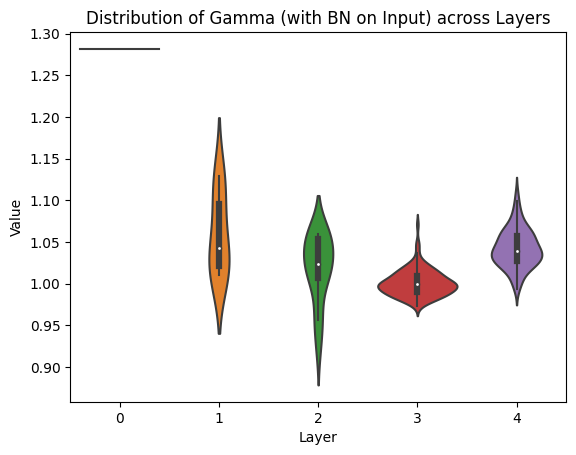

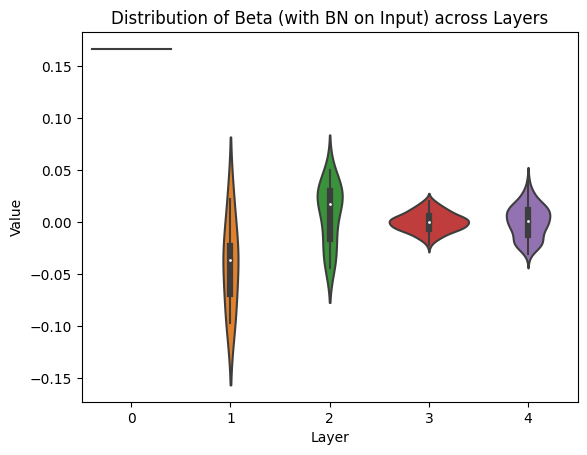

In [ ]:
# Extract the gamma and beta values from the model
gamma_values_bn_input = []  # For scale parameters
beta_values_bn_input = []   # For offset parameters

for layer in model_bn_input.layers:
    if isinstance(layer, layers.BatchNormalization):
        gamma, beta = layer.get_weights()[0], layer.get_weights()[1]
        gamma_values_bn_input.append(gamma)
        beta_values_bn_input.append(beta)

# Plot the violin plots using seaborn
import seaborn as sns

def plot_violin(data, title):
    parts = sns.violinplot(data=[np.asarray(d) for d in data], showmeans=True, showmedians=True)
    plt.title(title)
    plt.xlabel('Layer')
    plt.ylabel('Value')
    plt.show()

plot_violin(gamma_values_bn_input, 'Distribution of Gamma (with BN on Input) across Layers')
plot_violin(beta_values_bn_input, 'Distribution of Beta (with BN on Input) across Layers')


In [ ]:
layer_num = 1  # Start with layer number 1
for layer in model_bn_input.layers:
    if isinstance(layer, layers.BatchNormalization):
        gamma, beta = layer.get_weights()[0], layer.get_weights()[1]
        print(f"Layer {layer_num}:")
        print("Gammas:", gamma)
        print("Betas:", beta)
        print("\n----------------------------------------------------------------\n")
        layer_num += 1

Layer 1:
Gammas: [1.2816823]
Betas: [0.16644889]

----------------------------------------------------------------

Layer 2:
Gammas: [1.0262661 1.0197294 1.1081538 1.1296524 1.0600387 1.0101761]
Betas: [-0.01878901 -0.03993345  0.02224435 -0.09677564 -0.03366006 -0.07894289]

----------------------------------------------------------------

Layer 3:
Gammas: [1.0573001  0.96169895 0.9568003  1.0248408  1.0287012  1.0535147
 1.0083911  1.0593606  1.0029998  0.9251933  1.055803   1.0226306
 1.0571868  1.0161318  1.0221039  1.0508522 ]
Betas: [ 0.01490589  0.05041845  0.03276498 -0.03947958 -0.00259739  0.02870457
  0.03543328 -0.01872015 -0.03029875 -0.04376697  0.00780233  0.0213932
  0.02039412  0.03250255  0.02717942 -0.01523525]

----------------------------------------------------------------

Layer 4:
Gammas: [0.98184    1.0016414  1.0064905  0.9879029  0.9978372  0.98259246
 1.0020046  0.9848309  0.9822979  0.98383033 1.024861   0.99240375
 1.0015657  0.9774893  1.0158199  0.989100

Looking at the violin graphs when using Batch Normalization we can immediately notice the additional layer and lack fo the violin graph for it. This additional layer is due to the fact we added batch normalization for input layer but since there is no convolution it is applying batch normalization to a list of inputs and thus the output is a single number which causes us to plot a straight line rather than a violin diagram. Further we can notice that the violin plots seem smaller which would indicate using batch normalisation leads to less variance in our output. However, we can also notice that while gamma values variate around 1 they are not as centered to one as they were in the previous case when we did not use batch normalization on the input layer. Further, for beta values we can see the same, they do cluster around 0 but again not as precisely/closely as they did before.

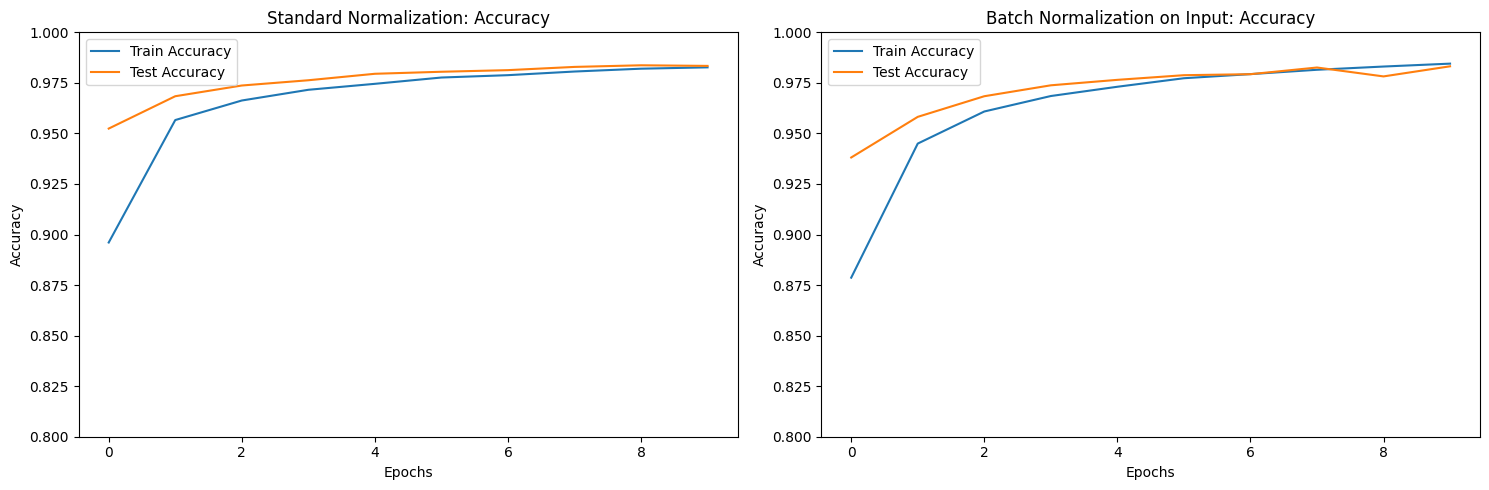

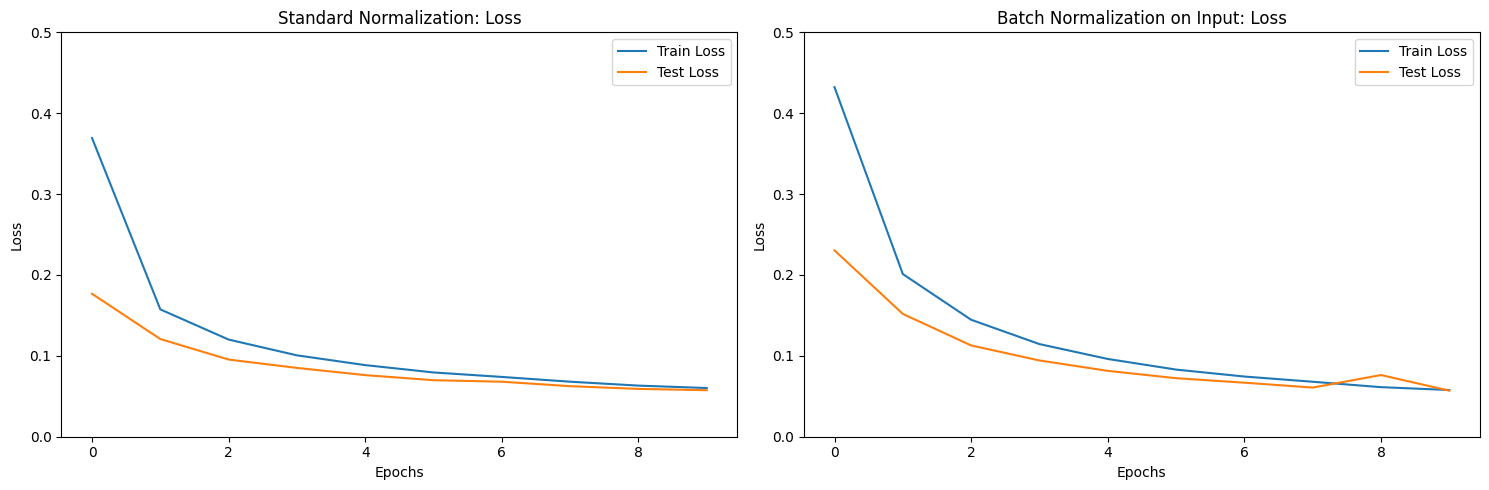

In [ ]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.figure(figsize=(15,5))

# Standard normalization accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Standard Normalization: Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1) # Ensuring that both subplots have the same y-axis scale
plt.legend()

# Batch normalization accuracy subplot
plt.subplot(1, 2, 2)
plt.plot(history_bn_input.history['accuracy'], label='Train Accuracy')
plt.plot(history_bn_input.history['val_accuracy'], label='Test Accuracy')
plt.title('Batch Normalization on Input: Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1) # Ensuring that both subplots have the same y-axis scale
plt.legend()

plt.tight_layout()
plt.show()

# Plotting loss
plt.figure(figsize=(15,5))

# Standard normalization loss subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Standard Normalization: Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 0.5)
plt.legend()

# Batch normalization loss subplot
plt.subplot(1, 2, 2)
plt.plot(history_bn_input.history['loss'], label='Train Loss')
plt.plot(history_bn_input.history['val_loss'], label='Test Loss')
plt.title('Batch Normalization on Input: Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 0.5)
plt.legend()

plt.tight_layout()
plt.show()


Looking at our accuracy plots we can notice that in both cases, with standard and with batch normalizations, increasing epochs increases our train and test accuracies at decresing pace. This means we might want to consider using lest epochs as at some point increasing number of epochs minimally increases the accuracy. One difference that is worth pointing out is that Test accuracy for Standard normalization is consistently higher than training accuracy while for batch normalization it falls bellow training accuracy at about 8 epochs.


Further, looking at out loss plots we can again notice that both models preform very similarly but for the Batch Normalization model we can see the same spike at about 8 epochs as we did for the drop in accuracy. Additionally, we can notice diminishing returns just like with accuracy - over more epochs loss decreases by less and less so it might not be worth it to use as much as 8 or more epochs. Overall, both models preform very well with decreasing loss and increasing accuracy reaching the accuracy of almost 98% in both cases.

## 4.4

In [ ]:
from tensorflow.keras import initializers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout

#LeNet-5 model
model_dropout = models.Sequential()
#input layer
model_dropout.add(layers.InputLayer(input_shape=(28, 28, 1)))
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0, seed=None)
model_dropout.add(Dropout(0.2))

#hidden layers
#C1
model_dropout.add(layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', kernel_initializer=initializer))
model_dropout.add(Dropout(0.5))


#S2
model_dropout.add(layers.AveragePooling2D(2))

#C3
model_dropout.add(layers.Conv2D(16, kernel_size=(5, 5), activation='tanh'))
model_dropout.add(Dropout(0.5))

#S4
model_dropout.add(layers.AveragePooling2D(2))

model_dropout.add(layers.Flatten())

#F5
model_dropout.add(layers.Dense(120, activation='tanh'))
model_dropout.add(Dropout(0.5))

#F6
model_dropout.add(layers.Dense(84, activation='tanh'))
model_dropout.add(Dropout(0.5))

#Output Layer
model_dropout.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model_dropout.compile(optimizer='sgd',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Train the model with dropout
history_dropout = model_dropout.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Extract training and testing accuracy values
train_acc_dropout = history_dropout.history['accuracy']
test_acc_dropout = history_dropout.history['val_accuracy']

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 1.0363 - accuracy: 0.6515 - val_loss: 0.3132 - val_accuracy: 0.9113
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.5972 - accuracy: 0.8098 - val_loss: 0.2342 - val_accuracy: 0.9284
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4970 - accuracy: 0.8424 - val_loss: 0.1915 - val_accuracy: 0.9410
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4386 - accuracy: 0.8623 - val_loss: 0.1696 - val_accuracy: 0.9485
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3998 - accuracy: 0.8769 - val_loss: 0.1509 - val_accuracy: 0.9546
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3628 - accuracy: 0.8868 - val_loss: 0.1333 - val_accuracy: 0.9593
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3442 - accuracy: 0.8946 - val_loss: 0.1311 -

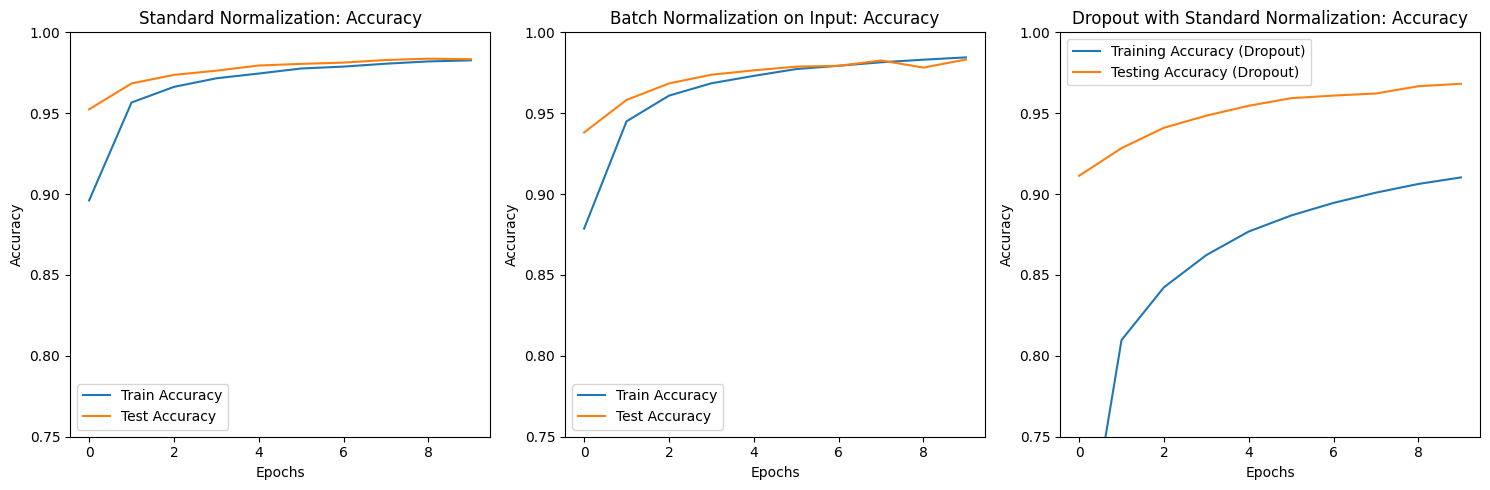

In [ ]:
# Plotting accuracy
plt.figure(figsize=(15,5))

# Standard normalization accuracy subplot
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Standard Normalization: Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.75, 1) # Ensuring that both subplots have the same y-axis scale
plt.legend()

# Batch normalization accuracy subplot
plt.subplot(1, 3, 2)
plt.plot(history_bn_input.history['accuracy'], label='Train Accuracy')
plt.plot(history_bn_input.history['val_accuracy'], label='Test Accuracy')
plt.title('Batch Normalization on Input: Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.75, 1) # Ensuring that both subplots have the same y-axis scale
plt.legend()

# Plotting for Dropout
plt.subplot(1, 3, 3)
plt.plot(train_acc_dropout, label='Training Accuracy (Dropout)')
plt.plot(test_acc_dropout, label='Testing Accuracy (Dropout)')
plt.title('Dropout with Standard Normalization: Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.75, 1)
plt.legend()

plt.tight_layout()
plt.show()


**Answer:**

Comparing our new diagram of Dropout while using Standard Normalization we can notice that both test and train accuracies are significanly lower than those of previous two graphs. This is due to the fact that we are dropping parts of our layers to prevent overfitting. Moreover, while testing accuracy seems very similar to those of the previous two diagrams without normalization, training accuracy is significantly lower at below 90% while both previous training accuracies were above 90% from the start. This is due to the fact we are dropping some of the training layers which decreases overfititng and with that training accuracy.

## 4.5

In [ ]:
from tensorflow.keras import initializers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout

#LeNet-5 model
model_dropout2 = models.Sequential()
#input layer
model_dropout2.add(layers.InputLayer(input_shape=(28, 28, 1)))
model_dropout2.add(layers.BatchNormalization())
model_dropout2.add(Dropout(0.2))

#hidden layers
#C1
model_dropout2.add(layers.Conv2D(6, kernel_size=(5, 5), activation='tanh'))
model_dropout2.add(layers.BatchNormalization())
model_dropout2.add(Dropout(0.5))


#S2
model_dropout2.add(layers.AveragePooling2D(2))

#C3
model_dropout2.add(layers.Conv2D(16, kernel_size=(5, 5), activation='tanh'))
model_dropout2.add(layers.BatchNormalization())
model_dropout2.add(Dropout(0.5))

#S4
model_dropout2.add(layers.AveragePooling2D(2))

model_dropout2.add(layers.Flatten())

#F5
model_dropout2.add(layers.Dense(120, activation='tanh'))
model_dropout2.add(layers.BatchNormalization())
model_dropout2.add(Dropout(0.5))

#F6
model_dropout2.add(layers.Dense(84, activation='tanh'))
model_dropout2.add(layers.BatchNormalization())
model_dropout2.add(Dropout(0.5))

#Output Layer
model_dropout2.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model_dropout2.compile(optimizer='sgd',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Train the model with dropout
history_dropout2 = model_dropout2.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Extract training and testing accuracy values
train_acc_dropout2 = history_dropout2.history['accuracy']
test_acc_dropout2 = history_dropout2.history['val_accuracy']

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.8707 - accuracy: 0.7197 - val_loss: 0.2691 - val_accuracy: 0.9159
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4870 - accuracy: 0.8485 - val_loss: 0.1683 - val_accuracy: 0.9485
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3710 - accuracy: 0.8865 - val_loss: 0.1217 - val_accuracy: 0.9619
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3220 - accuracy: 0.9043 - val_loss: 0.1191 - val_accuracy: 0.9626
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2924 - accuracy: 0.9123 - val_loss: 0.1058 - val_accuracy: 0.9667
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2719 - accuracy: 0.9205 - val_loss: 0.0953 - val_accuracy: 0.9706
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2562 - accuracy: 0.9246 - val_loss: 0.0938 -

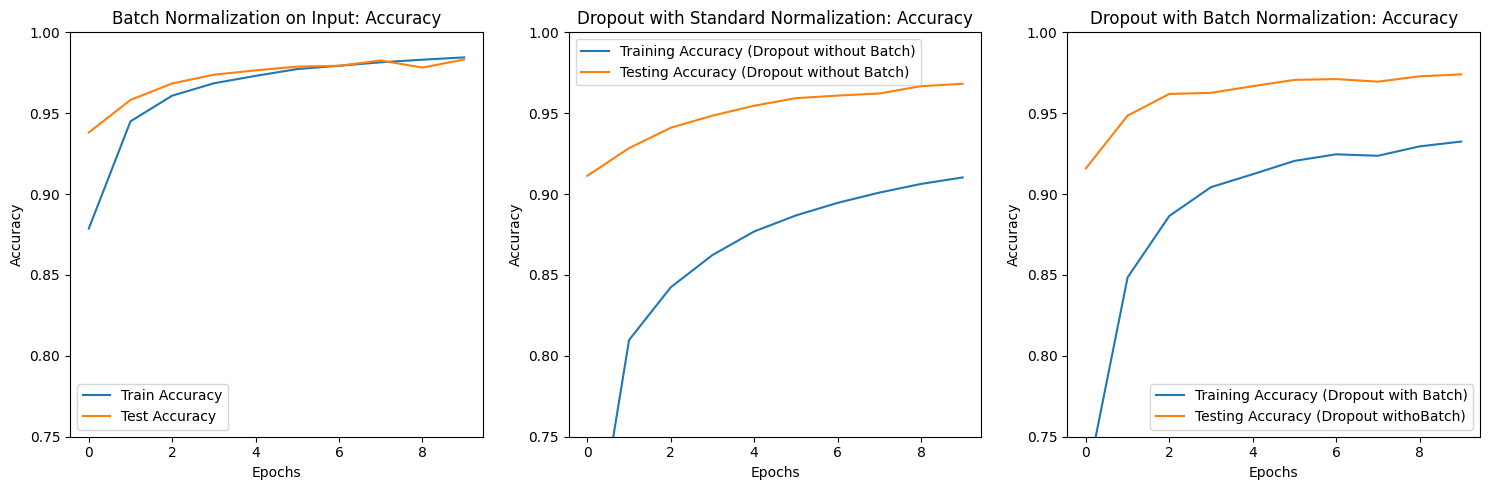

In [ ]:
# Plotting accuracy
plt.figure(figsize=(15,5))

# Batch normalization accuracy subplot
plt.subplot(1, 3, 1)
plt.plot(history_bn_input.history['accuracy'], label='Train Accuracy')
plt.plot(history_bn_input.history['val_accuracy'], label='Test Accuracy')
plt.title('Batch Normalization on Input: Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.75, 1) # Ensuring that both subplots have the same y-axis scale
plt.legend()

# Plotting for Dropout without Batch
plt.subplot(1, 3, 2)
plt.plot(train_acc_dropout, label='Training Accuracy (Dropout without Batch)')
plt.plot(test_acc_dropout, label='Testing Accuracy (Dropout without Batch)')
plt.title('Dropout with Standard Normalization: Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.75, 1)
plt.legend()

# Plotting for Dropout with Batch
plt.subplot(1, 3, 3)
plt.plot(train_acc_dropout2, label='Training Accuracy (Dropout with Batch)')
plt.plot(test_acc_dropout2, label='Testing Accuracy (Dropout withoBatch)')
plt.title('Dropout with Batch Normalization: Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.75, 1)
plt.legend()

plt.tight_layout()
plt.show()

**Answer:**

Comparing our Dropout with Batch Normalization to Droupout with Standard Normaliation and Batch Normalization without Droupout we can notice that both Dropout graphs have lower training and testing accuracies than the regular Batch Normalization. As previously mentioned this is due to dropping portion of our layers to decrease overfitting. Further we can notice that Dropout with Batch Normalization does have better outcome - higher train and test accuracies than Dropout with Standard Normalization which indicates Dropout preforms better with batch than Standard Normalization. Further we can notice that adding dropout significantly decreases training accuracy due to removing some of the layers and with that reducing overfitting in training compared to using Batch Normalization without Dropout.